# Simple Neural Network Music Genre Classification:

This notebook is dedicated to improving the test accuracy of the network presented in:
https://www.kaggle.com/code/aasimahmed04/music-genre-classifier

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import MaxAbsScaler
import tensorflow.keras as keras
import matplotlib.pyplot as plt
import librosa, IPython
import librosa.display as lplt

from sklearn.metrics import accuracy_score
from tensorflow.keras import Sequential
from tensorflow.keras.layers import *
from keras import regularizers

import IPython.display as ipd
from IPython.display import Audio

## 1. Load And Arrange The Data

The data set is included a .csv file with the extracted features:

In [2]:
df = pd.read_csv('features_3_sec.csv')

#### Check If The Data Is Balanced:

Class Balance:

In [3]:
df.label.value_counts().reset_index()

,label,count
0,blues,1000
1,jazz,1000
2,metal,1000
3,pop,1000
4,reggae,1000
5,disco,999
6,classical,998
7,hiphop,998
8,rock,998
9,country,997


We have exactly 100 samples out of each class.

In [4]:
data = df.iloc[:,1:59];
labels_str = df['label'];

Map labels to numbers:

In [5]:
map_ = {
    "blues"     : 0,
    "classical" : 1,
    "country"   : 2,
    "disco"     : 3,
    "hiphop"    : 4,
    "jazz"      : 5,
    "metal"     : 6,
    "pop"       : 7,
    "reggae"    : 8,
    "rock"      : 9,
}

In [6]:
labels = np.array([map_[label_] for label_ in labels_str])

## 2. Pre-Processing:

Scale the data to prevent feature imbalances:

In [7]:
data_scaler = MaxAbsScaler().fit(data);

In [8]:
scaled_data = data_scaler.transform(data);

Convert to float64 for better computation:

In [9]:
scaled_data.astype('float64', casting = 'same_kind');

Split the data to train and test:

In [10]:
X_train, X_test, y_train, y_test = train_test_split(scaled_data, labels, test_size=0.15,shuffle=True, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2,shuffle=True, random_state=1)

In [11]:
print("Train data size: ", X_train.shape);
print("Validation data size: ",X_val.shape);
print("Test data size: ", X_test.shape);

Train data size:  (6792, 58)
Validation data size:  (1699, 58)
Test data size:  (1499, 58)


## 4. Defining The Network:

In [12]:
#Creating a Neural Network
model = Sequential() 
  
model.add(Flatten(input_shape=(58,))) 
model.add(Dense(256, activation='relu')) 
model.add(BatchNormalization()) 
model.add(Dense(128, activation='relu')) 
model.add(Dropout(0.3))  
model.add(Dense(10, activation='softmax')) 

model.summary()

C:\Users\420\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 58)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │          15,104 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 50,314 (196.54 KB)

 Trainable params: 49,802 (194.54 KB)

 Non-trainable params: 512 (2.00 KB)

Compiling and fitting:

In [13]:
#Compiling & Fitting the Model
adam = keras.optimizers.Adam(learning_rate=1e-4)
model.compile(optimizer=adam, 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])
hist = model.fit(X_train, y_train, validation_data= (X_val, y_val),
                epochs=100,
                batch_size=32)

Epoch 1/100
213/213 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.2064 - loss: 2.3131 - val_accuracy: 0.4538 - val_loss: 2.0520
Epoch 2/100
213/213 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4540 - loss: 1.5395 - val_accuracy: 0.5603 - val_loss: 1.5408
Epoch 3/100
213/213 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5368 - loss: 1.3289 - val_accuracy: 0.6304 - val_loss: 1.1582
Epoch 4/100
213/213 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5875 - loss: 1.1919 - val_accuracy: 0.6669 - val_loss: 1.0143
Epoch 5/100
213/213 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6312 - loss: 1.0792 - val_accuracy: 0.6933 - val_loss: 0.9311
Epoch 6/100
213/213 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6406 - loss: 1.0275 - val_accuracy: 0.7087 - val_loss: 0.8760
Epoch 7/100
213/213 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6528 - loss: 0.9831 - val_accuracy: 0.7287 - val_loss: 0.8322
Epoch 8/100
213/213 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6817 - loss: 0.9376 - val_accu

213/213 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8927 - loss: 0.3357 - val_accuracy: 0.8687 - val_loss: 0.4033
Epoch 52/100
213/213 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8971 - loss: 0.3111 - val_accuracy: 0.8682 - val_loss: 0.3992
Epoch 53/100
213/213 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9008 - loss: 0.3150 - val_accuracy: 0.8699 - val_loss: 0.3979
Epoch 54/100
213/213 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8921 - loss: 0.3230 - val_accuracy: 0.8740 - val_loss: 0.3938
Epoch 55/100
213/213 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9072 - loss: 0.2854 - val_accuracy: 0.8752 - val_loss: 0.3898
Epoch 56/100
213/213 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9111 - loss: 0.2809 - val_accuracy: 0.8729 - val_loss: 0.3925
Epoch 57/100
213/213 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8970 - loss: 0.2971 - val_accuracy: 0.8764 - val_loss: 0.3837
Epoch 58/100
213/213 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9018 - loss: 0.2966 - val_accuracy:

Test set:

In [14]:
y_predict = np.argmax(model.predict(X_test),axis=1)

47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


In [15]:
acc = np.mean(y_predict == y_test)*100
print("test accuracy = %.2f"%acc, "%");

test accuracy = 90.66 %


Plot original scores:

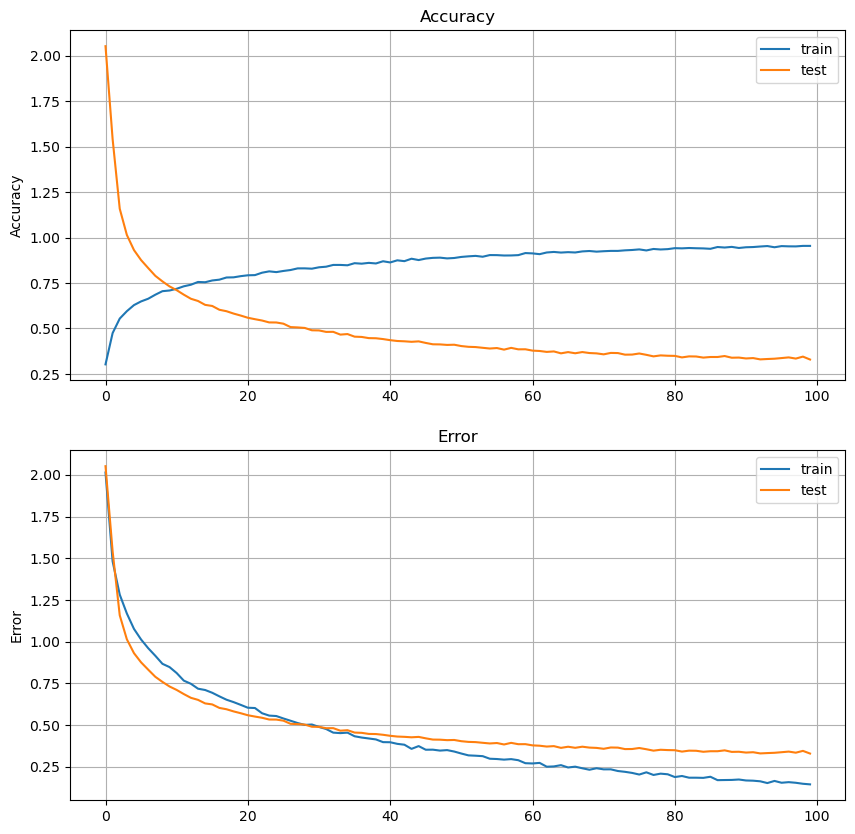

In [16]:
fig, axs = plt.subplots(2, figsize=(10, 10))

#Accuracy
axs[0].plot(hist.history['accuracy'], label="train")
axs[0].plot(hist.history['val_loss'], label="test")
axs[0].set_ylabel("Accuracy")
axs[0].legend()
axs[0].set_title("Accuracy")
axs[0].grid()

#Error
axs[1].plot(hist.history["loss"], label="train") 
axs[1].plot(hist.history["val_loss"], label="test")     
axs[1].set_ylabel("Error") 
axs[1].legend() 
axs[1].set_title("Error") 
axs[1].grid()  
    
plt.show()

#### Confusion Matrix

In [17]:
cm = confusion_matrix(y_test, y_predict);

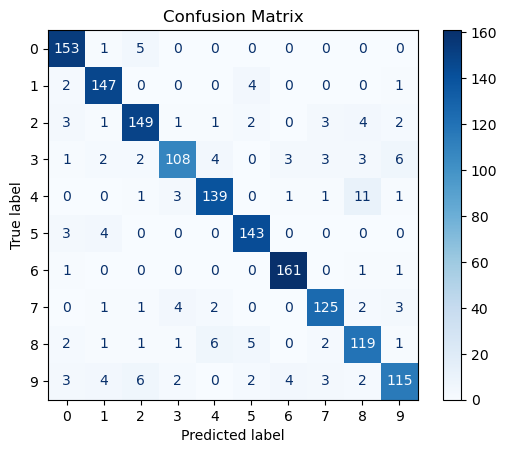

In [18]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap="Blues", values_format="d")

plt.title('Confusion Matrix')
plt.show()

# Improving The Network:

In [19]:
#Creating a Neural Network
model = Sequential() 
  
model.add(Flatten(input_shape=(58,))) 
model.add(Dense(256,kernel_regularizer=regularizers.l2(0.0005), activation='relu')) 
model.add(BatchNormalization()) 
model.add(Dense(128,kernel_regularizer=regularizers.l2(0.0005), activation='relu')) 
model.add(Dropout(0.3)) 
model.add(Dense(10, activation='softmax')) 

model.summary()

C:\Users\420\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)                  │ (None, 58)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 256)                 │          15,104 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 50,314 (196.54 KB)

 Trainable params: 49,802 (194.54 KB)

 Non-trainable params: 512 (2.00 KB)

In [20]:
#Compiling & Fitting the Model
adam = keras.optimizers.Adam(learning_rate=1e-4)
model.compile(optimizer=adam, 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])
hist = model.fit(X_train, y_train, validation_data= (X_val, y_val),
                epochs=100,
                batch_size=32)

Epoch 1/100
213/213 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.2068 - loss: 2.3905 - val_accuracy: 0.4679 - val_loss: 2.1491
Epoch 2/100
213/213 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4823 - loss: 1.6305 - val_accuracy: 0.5898 - val_loss: 1.6320
Epoch 3/100
213/213 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5488 - loss: 1.4402 - val_accuracy: 0.6327 - val_loss: 1.2604
Epoch 4/100
213/213 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6041 - loss: 1.2799 - val_accuracy: 0.6716 - val_loss: 1.1228
Epoch 5/100
213/213 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6391 - loss: 1.1959 - val_accuracy: 0.6969 - val_loss: 1.0504
Epoch 6/100
213/213 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6542 - loss: 1.1357 - val_accuracy: 0.7151 - val_loss: 0.9963
Epoch 7/100
213/213 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6705 - loss: 1.0790 - val_accuracy: 0.7251 - val_loss: 0.9587
Epoch 8/100
213/213 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6847 - loss: 1.0455 - val_accu

213/213 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8944 - loss: 0.4537 - val_accuracy: 0.8682 - val_loss: 0.5231
Epoch 52/100
213/213 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8921 - loss: 0.4637 - val_accuracy: 0.8735 - val_loss: 0.5149
Epoch 53/100
213/213 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8943 - loss: 0.4426 - val_accuracy: 0.8705 - val_loss: 0.5128
Epoch 54/100
213/213 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8883 - loss: 0.4498 - val_accuracy: 0.8676 - val_loss: 0.5124
Epoch 55/100
213/213 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8934 - loss: 0.4438 - val_accuracy: 0.8746 - val_loss: 0.5074
Epoch 56/100
213/213 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9053 - loss: 0.4280 - val_accuracy: 0.8664 - val_loss: 0.5180
Epoch 57/100
213/213 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9085 - loss: 0.4170 - val_accuracy: 0.8723 - val_loss: 0.5097
Epoch 58/100
213/213 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9032 - loss: 0.4329 - val_accuracy:

Test set:

In [21]:
y_predict = np.argmax(model.predict(X_test),axis=1)

47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


In [22]:
acc = np.mean(y_predict == y_test)*100
print("test accuracy = %.2f"%acc, "%");

test accuracy = 90.39 %


Plot scores:

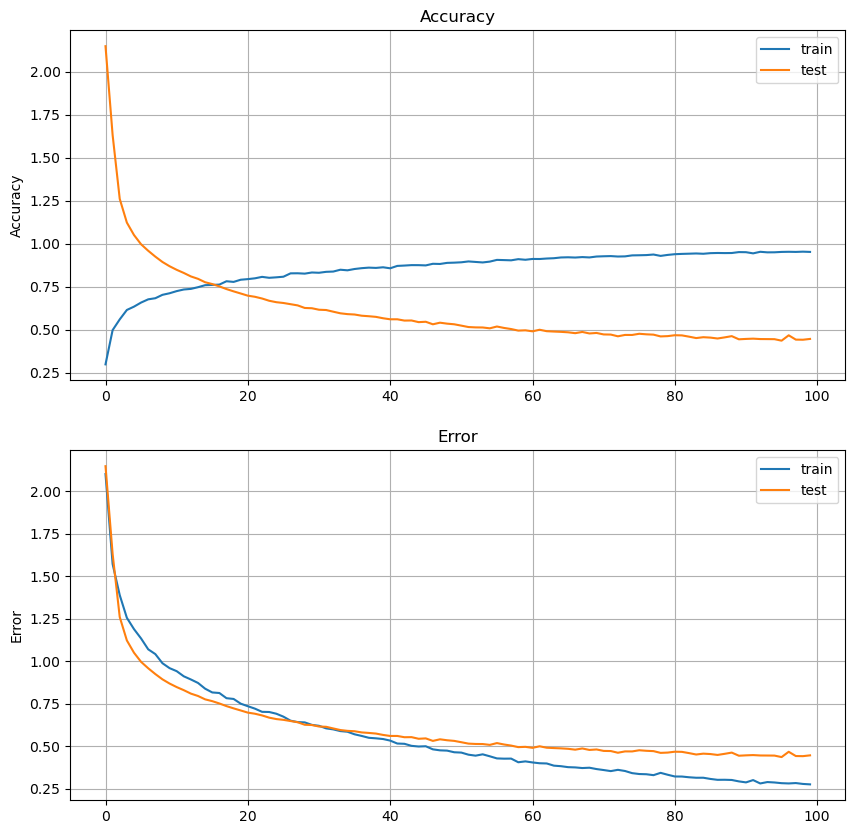

In [23]:
fig, axs = plt.subplots(2, figsize=(10, 10))

#Accuracy
axs[0].plot(hist.history['accuracy'], label="train")
axs[0].plot(hist.history['val_loss'], label="test")
axs[0].set_ylabel("Accuracy")
axs[0].legend()
axs[0].set_title("Accuracy")
axs[0].grid()

#Error
axs[1].plot(hist.history["loss"], label="train") 
axs[1].plot(hist.history["val_loss"], label="test")     
axs[1].set_ylabel("Error") 
axs[1].legend() 
axs[1].set_title("Error") 
axs[1].grid()

plt.show()

#### Confusion Matrix

In [24]:
cm = confusion_matrix(y_test, y_predict);

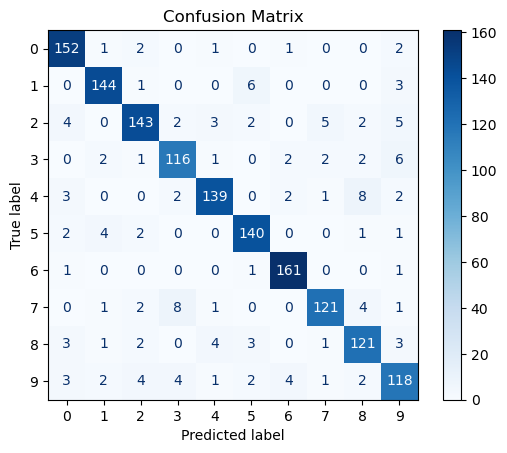

In [25]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap="Blues", values_format="d")

plt.title('Confusion Matrix')
plt.show()